In [56]:
#reading csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("2017_jun_final.csv")
print(df)

         N                 Должность Язык.программирования Специализация  \
0        1        Junior QA engineer                   NaN     Manual QA   
1        2        Junior QA engineer                   NaN     Manual QA   
2        3         Software Engineer               C#/.NET           NaN   
3        4         Software Engineer            JavaScript           NaN   
4        5  Senior Software Engineer            JavaScript           NaN   
...    ...                       ...                   ...           ...   
8699  8700               QA engineer                   NaN     Manual QA   
8700  8701                 Marketing                   NaN           NaN   
8701  8702  Junior Software Engineer            Ruby/Rails           NaN   
8702  8703                 Team lead                   NaN           NaN   
8703  8704  Senior Software Engineer                  Java           NaN   

     Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0             

In [57]:
#printing head
print(df.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [58]:
#finding shape
print(df.shape)

(8704, 25)


In [59]:
#types
print(df.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [60]:
#counting nulls
nulls = df.isnull().sum()
print(nulls)

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [61]:
#dropping columns with nulls
for d in df:
    if not d == 'Язык.программирования' and df[d].isnull().sum()>0:
        df.drop(d, axis=1, inplace=True)
print(df)

         N                 Должность Язык.программирования Общий.опыт.работы  \
0        1        Junior QA engineer                   NaN               0.5   
1        2        Junior QA engineer                   NaN  меньше 3 месяцев   
2        3         Software Engineer               C#/.NET                 4   
3        4         Software Engineer            JavaScript                 5   
4        5  Senior Software Engineer            JavaScript    10 и более лет   
...    ...                       ...                   ...               ...   
8699  8700               QA engineer                   NaN                 1   
8700  8701                 Marketing                   NaN               0.5   
8701  8702  Junior Software Engineer            Ruby/Rails                 1   
8702  8703                 Team lead                   NaN                 6   
8703  8704  Senior Software Engineer                  Java                 7   

     Опыт.работы.на.текущем.месте  Зарп

In [62]:
#recounting nulls
nulls = df.isnull().sum()
print(nulls)

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64


In [63]:
#dropping nulls
df.dropna(inplace=True)
print(df)

         N                 Должность Язык.программирования Общий.опыт.работы  \
2        3         Software Engineer               C#/.NET                 4   
3        4         Software Engineer            JavaScript                 5   
4        5  Senior Software Engineer            JavaScript    10 и более лет   
6        7  Junior Software Engineer               C#/.NET                 1   
7        8  Senior Software Engineer                   C++                 6   
...    ...                       ...                   ...               ...   
8692  8693         Software Engineer                  Java                 5   
8694  8695  Junior Software Engineer               C#/.NET                 1   
8695  8696         Software Engineer                Python                 1   
8701  8702  Junior Software Engineer            Ruby/Rails                 1   
8703  8704  Senior Software Engineer                  Java                 7   

     Опыт.работы.на.текущем.месте  Зарп

In [64]:
#finding new shape
print(df.shape)

(4854, 20)


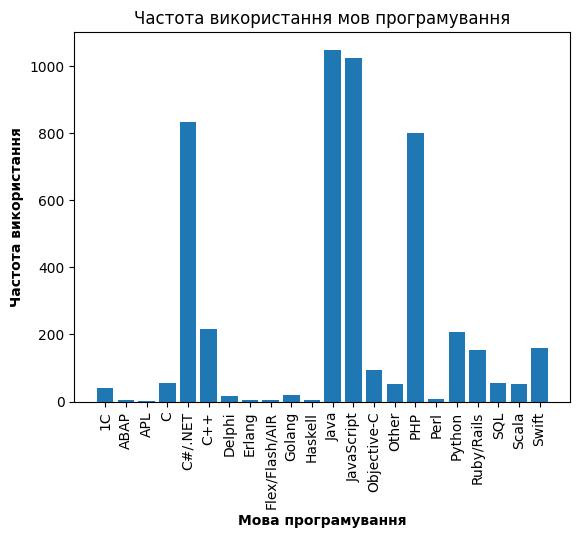

In [89]:
#plotting programming languages frequency of use
frequency = df.pivot_table(index="Язык.программирования", aggfunc='size')
plt.bar(frequency.index, frequency)
plt.xticks(rotation=90)
plt.title("Частота використання мов програмування")
plt.xlabel("Мова програмування", fontweight='bold')
plt.ylabel("Частота використання", fontweight='bold')
plt.show()


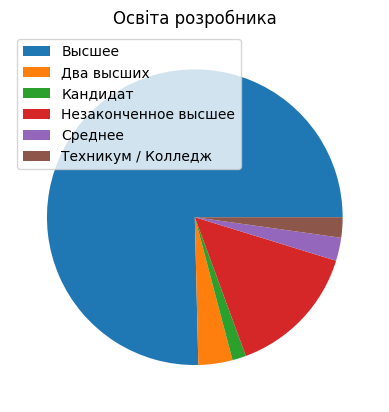

In [98]:
#plotting education
frequency = df.pivot_table(index="Образование", aggfunc='size')
plt.pie(frequency)
plt.legend(frequency.index, loc='upper left')
plt.title("Освіта розробника")
plt.show()

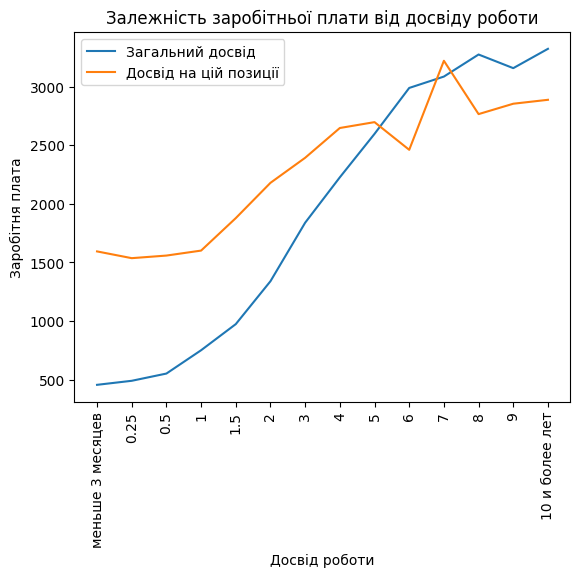

In [106]:
#plotting salary for experience
total_exp_data = df.groupby("Общий.опыт.работы")
total_exp_data = total_exp_data["Зарплата.в.месяц"].agg(salary="mean")
total_exp_data = total_exp_data.reindex(["меньше 3 месяцев", "0.25", "0.5", "1", "1.5", "2", "3", "4", "5",\
                                       "6", "7", "8", "9", "10 и более лет"])
current_position_exp_data = df.groupby("Опыт.работы.на.текущем.месте")
current_position_exp_data = current_position_exp_data["Зарплата.в.месяц"].agg(salary="mean")
current_position_exp_data = current_position_exp_data.reindex(["меньше 3 месяцев", "0.25", "0.5", "1", "1.5", "2", "3",\
                                                                "4", "5", "6", "7", "8", "9", "10 и более лет"])

fig, axs = plt.subplots()
axs.plot(total_exp_data.index, total_exp_data, label="Загальний досвід")
axs.plot(current_position_exp_data.index, current_position_exp_data, label="Досвід на цій позиції")
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Досвід роботи")
plt.ylabel("Заробітня плата")
plt.title("Залежність заробітньої плати від досвіду роботи")
plt.show()

In [66]:
#creating new DataFrame
python_data = df[(df["Язык.программирования"]=="Python")]
print(python_data)

         N                 Должность Язык.программирования Общий.опыт.работы  \
12      13         Software Engineer                Python                 1   
68      69         Software Engineer                Python               1.5   
87      88  Junior Software Engineer                Python               0.5   
114    115  Junior Software Engineer                Python               1.5   
143    144  Junior Software Engineer                Python                 1   
...    ...                       ...                   ...               ...   
8546  8547         Software Engineer                Python                 5   
8625  8626         Software Engineer                Python                 4   
8635  8636  Senior Software Engineer                Python    10 и более лет   
8673  8674  Junior Software Engineer                Python               0.5   
8695  8696         Software Engineer                Python                 1   

     Опыт.работы.на.текущем.месте  Зарп

In [67]:
#finding shape
print(python_data.shape)

(207, 20)


In [68]:
#groupping
python_data_grouped = python_data.groupby("Должность")

In [69]:
#aggregation
python_salaries_data = python_data_grouped["Зарплата.в.месяц"].agg(minimal="min", maximal="max")
print(python_salaries_data)

                          minimal  maximal
Должность                                 
Junior Software Engineer      100     1250
Senior Software Engineer     1300     9200
Software Engineer             500     5400
System Architect             3000     5000
Technical Lead               1425     6200


In [70]:
#average salary
def fill_avg_salary(df):
    return df.mean()
avg = python_data_grouped["Зарплата.в.месяц"].apply(fill_avg_salary)
python_salaries_data['avg'] = avg
print(python_salaries_data)

                          minimal  maximal          avg
Должность                                              
Junior Software Engineer      100     1250   560.841270
Senior Software Engineer     1300     9200  3387.096774
Software Engineer             500     5400  1799.070000
System Architect             3000     5000  4000.000000
Technical Lead               1425     6200  3165.909091


In [71]:
#describe
describe = python_salaries_data["avg"].describe()
print(describe)

count       5.000000
mean     2582.583427
std      1387.255829
min       560.841270
25%      1799.070000
50%      3165.909091
75%      3387.096774
max      4000.000000
Name: avg, dtype: float64


In [72]:
#saving
python_salaries_data.to_csv("prepared_data.csv")